<a href="https://colab.research.google.com/github/brunorodriguesti/Experiment_CF_ML_Bug_Fixing_Time/blob/main/Preparing_data_bug_fix_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
pd.show_versions()

In [ ]:
cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [ ]:
cd Colab\ Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import nltk

In [ ]:
#Select the dataset
#data_bug = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/netbeans-dataset.csv', low_memory=False)
data_bug = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/eclipse_dataset1.csv', low_memory=False)

In [ ]:
data_bug['year_creation'] = pd.to_numeric(pd.DatetimeIndex(data_bug['creation_ts']).year)
data_bug['year_creation_n'] = pd.to_datetime(data_bug['creation_ts']).dt.to_period('Y')
data_bug['month_creation'] = pd.DatetimeIndex(data_bug['creation_ts']).month
data_bug['year_lastdiffed'] = pd.DatetimeIndex(data_bug['lastdiffed']).year
data_bug['month_lastdiffed'] = pd.DatetimeIndex(data_bug['lastdiffed']).month
bugfix = data_bug[(data_bug['resolution'] == 'FIXED') & (data_bug['lastdiffed'].notna())]

In [ ]:
list(data_bug)

In [ ]:
data_bug.head()

#Analysing the dataset

In [ ]:
data_bug.describe()

In [ ]:
data_bug.shape

In [ ]:
 data_bug['reporter'].nunique()

2416

In [ ]:
data_bug['assigned_to'].nunique()

219

In [ ]:
data_bug.groupby('reporter').size()

reporter
2         53
3        268
5         52
6         87
9          6
        ... 
92270      1
92271      1
92273      1
92278      2
92280      1
Length: 2416, dtype: int64

In [ ]:
list(data_bug)

In [ ]:
 data_bug['resolution'].value_counts()

FIXED         4747
DUPLICATE     1501
WORKSFORME     576
INVALID        410
WONTFIX        406
INCOMPLETE     369
Name: resolution, dtype: int64

In [ ]:
data_bug['bug_severity'].value_counts()

normal         12088
enhancement        3
Name: bug_severity, dtype: int64

In [ ]:
data_bug['priority'].value_counts()

P3    9124
P2    1785
P1     655
P4     527
Name: priority, dtype: int64

In [ ]:
bugfix = data_bug[(data_bug['resolution'] == 'FIXED') & (data_bug['lastdiffed'].notna())]
bugdifzero = bugfix[bugfix['days'] != 0]

In [ ]:
bugfix.shape

(4747, 25)

In [ ]:
bugfix['days'].describe()

count    4747.000000
mean       27.358332
std        40.299980
min         0.000000
25%         3.000000
50%         9.000000
75%        33.000000
max       217.000000
Name: days, dtype: float64

In [ ]:
bugfix['days'].median()

9.0

In [ ]:
priority = bugfix[(bugfix['priority'] == 'P1')]

priority['days'].describe()

count    420.000000
mean      20.802381
std       34.926879
min        0.000000
25%        3.000000
50%        7.000000
75%       19.000000
max      217.000000
Name: days, dtype: float64

In [ ]:
priority['days'].median()

7.0

In [ ]:
print(priority['days'].mode())

0    1
dtype: int64


In [ ]:
severity = bugfix[(bugfix['bug_severity'] == 'enhancement')]

severity['days'].describe()

count    17363.000000
mean       340.309969
std        452.182009
min          0.000000
25%         32.000000
50%        153.000000
75%        463.000000
max       3070.000000
Name: days, dtype: float64

In [ ]:
severity['days'].mode()

0    0.0
dtype: float64

In [ ]:
severity['days'].median()

26.0

In [ ]:
severity[['short_desc', 'comments']]

In [ ]:
bugfix['product_id'].value_counts()

In [ ]:
bugfix[['product_id', 'days']]

In [ ]:
bugfix['assigned_to'].nunique()

2085

In [ ]:
bugfix.columns

In [ ]:
bugYear = bugfix.groupby('year_lastdiffed')
print(bugYear['assigned_to'].agg(np.count_nonzero))

year_lastdiffed
2009     663
2010    4084
Name: assigned_to, dtype: int64


In [ ]:
bugYear = bugfix.groupby('year_creation')
print(bugYear['reporter'].agg(np.count_nonzero))

year_creation
2009    1262
2010    3485
Name: reporter, dtype: int64


Calcular a média de tempo de resolução de bugs por ano

In [ ]:
bugYear = bugfix.groupby('year_lastdiffed')
print(bugYear['days'].agg(np.mean))

year_lastdiffed
2009     7.404223
2010    30.597698
Name: days, dtype: float64


In [ ]:
bugYear = bugfix.groupby('year_lastdiffed')
print(bugYear['product_id'].agg(np.count_nonzero))

year_lastdiffed
2009     663
2010    4084
Name: product_id, dtype: int64


#Outliers


In [ ]:
bugfix['days'].describe()

count    171413.000000
mean        219.683851
std         386.383059
min           0.000000
25%           6.000000
50%          44.000000
75%         239.000000
max        3131.000000
Name: days, dtype: float64

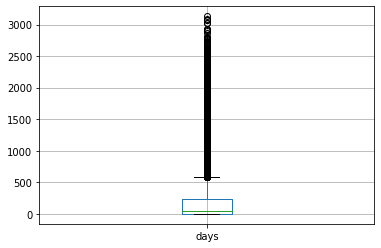

In [ ]:
#Tentar usar o log
bugfix.boxplot(column='days')
plt.show()

In [ ]:
quantirl1, quantirl3 = np.percentile(bugfix['days'], [25, 75])
print(quantirl1)
print(quantirl3)

In [ ]:
bugfix.shape

In [ ]:
bug_q3 = bugfix[bugfix['days'] > quantirl3]
bug_q0 = bugfix[bugfix['days'] == 0]


print ('maior que o quartil: ' + str(bug_q3['days'].count()) + ' zero :' + str(bug_q0['days'].count()))

In [ ]:
bugfix_filter1 = bugfix[bugfix['days'] < quantirl3]
bugfix_filter2 = bugfix_filter1[bugfix['days'] > 0]

In [ ]:
bugfix_filter2['days'].median()

In [ ]:
median = bugfix_filter2['days'].median()
bugfixclass = bugfix_filter2
pd.options.mode.chained_assignment = None
bugfixclass.loc[bugfixclass['days'] <=median, 'classification'] = 0
bugfixclass.loc[bugfixclass['days'] >median, 'classification'] = 1



In [ ]:
bugfixclass.shape

In [ ]:
bugfixclass['classification'].value_counts()

In [ ]:
#set the less value of each dataset
excess = bugfixclass[bugfixclass['classification']==0][56952:]

In [ ]:
bugfixclass = bugfixclass.drop(excess.index)

In [ ]:
bugfixclass['classification'].value_counts()

In [ ]:
len(bugfixclass)

In [ ]:
#Adding the cc and attachment for each dataset
data_cc_count = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/netbeans-cc-counts.csv', low_memory=False)
data_attachments_count = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/netbeans-attachments-counts.csv', low_memory=False)

#data_cc_count = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/eclipse-cc-count.csv', low_memory=False)
#data_attachments_count = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/eclipse-attachments-count.csv', low_memory=False)


In [ ]:
bugfixclass = bugfixclass.merge(data_cc_count, on ='bug_id', how='left')
bugfixclass = bugfixclass.merge(data_attachments_count, on ='bug_id', how='left')

In [ ]:
bugfixclass["number_cc"] = bugfixclass['number_cc'].fillna(0)
bugfixclass["number_attachment"] = bugfixclass['number_attachment'].fillna(0)

In [ ]:
bugfixclass['classification'].value_counts()

In [ ]:
bugfixclass['days'].describe()

In [ ]:
first = 1
second = np.percentile(bugfixclass['days'], [25])
third = np.percentile(bugfixclass['days'], [50])
forth = np.percentile(bugfixclass['days'], [75])
np.percentile(bugfixclass['days'], [25, 50, 75])

array([ 6., 13., 16.])

In [ ]:
bugfixclass.loc[(bugfixclass['days'] <= int(first)), 'ratings'] = 1
bugfixclass.loc[(bugfixclass['days'] > int(first)) & (bugfixclass['days'] <= int(second)) , 'ratings'] = 2
bugfixclass.loc[(bugfixclass['days'] > int(second)) & (bugfixclass['days'] <= int(third)), 'ratings'] = 3
bugfixclass.loc[(bugfixclass['days'] > int(third)) & (bugfixclass['days'] <= int(forth)), 'ratings'] = 4
bugfixclass.loc[bugfixclass['days'] > int(forth), 'ratings'] = 5

In [ ]:
bugfixclass.columns

Index(['bug_id', 'assigned_to', 'bug_severity', 'priority', 'bug_status',
       'creation_ts', 'delta_ts', 'short_desc', 'short_desc.1', 'comments',
       'op_sys', 'rep_platform', 'reporter', 'version', 'resolution',
       'lastdiffed', 'estimated_time', 'product_id', 'component_id', 'days',
       'year_creation', 'year_creation_n', 'month_creation', 'year_lastdiffed',
       'month_lastdiffed', 'classification', 'number_cc', 'number_attachment'],
      dtype='object')

#Correlação - Spearman

In [ ]:
import scipy.stats

In [ ]:

print ('reporter ', scipy.stats.spearmanr(bugfixclass['reporter'].astype('category'), bugfixclass['days']))
print ('priority ', scipy.stats.spearmanr(bugfixclass['priority'].astype('category'), bugfixclass['days']))
print ('bug_severity ', scipy.stats.spearmanr(bugfixclass['bug_severity'].astype('category'), bugfixclass['days']))
print ('assigned_to ', scipy.stats.spearmanr(bugfixclass['assigned_to'].astype('category'), bugfixclass['days']))
print ('number_cc ', scipy.stats.spearmanr(bugfixclass['number_cc'].astype('category'), bugfixclass['days']))
print ('number_attachment ', scipy.stats.spearmanr(bugfixclass['number_attachment'].astype('category'), bugfixclass['days']))

reporter  SpearmanrResult(correlation=0.008892615612720927, pvalue=0.6224600580503741)
priority  SpearmanrResult(correlation=-0.015191010521185254, pvalue=0.40027590981867167)
bug_severity  SpearmanrResult(correlation=nan, pvalue=nan)
assigned_to  SpearmanrResult(correlation=0.03439612866557717, pvalue=0.05678362482280548)
number_cc  SpearmanrResult(correlation=0.21046805766443327, pvalue=4.6520938464618994e-32)
number_attachment  SpearmanrResult(correlation=0.0004472531216955643, pvalue=0.9802439669907264)


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


#Features

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [ ]:
bugfixclass['priority_n']  = ordinal_encoder.fit_transform(bugfixclass['priority'].values.reshape(-1,1))

In [ ]:
bugfixclass['priority_n']

In [ ]:
bugfixclass['severity_n']  = ordinal_encoder.fit_transform(bugfixclass['bug_severity'].values.reshape(-1,1))

In [ ]:
bugfixclass['classification'].value_counts()

In [ ]:
#Export to CSV

#bugfixclass.to_csv('eclipse_clean.csv')
bugfixclass.to_csv('netbeans_clean.csv')